<a href="https://colab.research.google.com/github/sh939940/MLP_boston/blob/main/MLP_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import keras
import numpy as np

from keras.datasets import boston_housing

from sklearn import preprocessing
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [8]:
(x_train , y_train) , (x_test , y_test) = boston_housing.load_data()
#y_train[0]
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
x_train.shape

(404, 13)

In [10]:
x_train_scaled = preprocessing.scale(x_train)

x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [11]:
x_test_scaled = preprocessing.scale(x_test)

x_test_scaled[0]

array([ 2.8040301 , -0.50784934,  0.96960877, -0.32969024,  1.23174581,
        0.11934137,  1.14739788, -0.91935276,  1.60609286,  1.40778227,
        0.90513041, -4.27829517,  2.51324773])

In [12]:
# Start to build the model
model = Sequential()


model.add(Dense(64,activation = "relu",input_shape=(13,)))
model.add(Dropout(0,25))

model.add(Dense(64 ,activation= "relu"))
model.add(Dropout(0.3))

model.add(Dense(1 , activation= "relu"))



model.compile(loss='mse', optimizer = "sgd" , metrics = ['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Model_training
history = model.fit(
                  x_train_scaled,
                  y_train,
                  batch_size= 128,# MBGD
                  epochs=700,
                  verbose=1,
                  validation_split=0.2,
                  callbacks = [EarlyStopping(monitor= "val_loss" , patience=100)]
                  )

Epoch 1/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 507.6647 - mse: 507.6647 - val_loss: 165.7123 - val_mse: 165.7123
Epoch 2/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 320.6494 - mse: 320.6494 - val_loss: 213.0031 - val_mse: 213.0031
Epoch 3/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 125.4950 - mse: 125.4950 - val_loss: 168.4678 - val_mse: 168.4678
Epoch 4/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 234.6606 - mse: 234.6606 - val_loss: 513.3364 - val_mse: 513.3364
Epoch 5/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 416.9918 - mse: 416.9918 - val_loss: 89.6423 - val_mse: 89.6423
Epoch 6/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 109.9648 - mse: 109.9648 - val_loss: 110.6090 - val_mse: 110.6090
Epoch 7/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 85.2713 - mse: 85.2713 - val_loss: 43.4056 - val_mse: 43.4056
Epoch 8/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 77.6772 - mse: 77.6772 - val_loss: 64.8416 - val_mse: 64.8416
Epoch 9/700
3/3 ━

In [14]:
score = model.evaluate(x_test_scaled,
                       y_test,
                       verbose=0)

print("test loss :",score[0])
print("test loss :",score[1])

test loss : 15.425617218017578
test loss : 15.425617218017578


In [15]:
y_model = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [16]:
print(history.history['mse'])
# It prints the Mean Squared Error (MSE) values recorded during each epoch of training on the training set.

[474.2291564941406, 349.45452880859375, 104.6379623413086, 266.9972229003906, 395.95965576171875, 124.14771270751953, 74.95726013183594, 91.01168060302734, 44.944435119628906, 47.77397537231445, 70.47018432617188, 47.305442810058594, 53.113155364990234, 26.07742691040039, 21.132131576538086, 20.98238182067871, 44.969573974609375, 18.66570281982422, 21.904199600219727, 28.003042221069336, 37.85731887817383, 23.91466522216797, 24.138154983520508, 38.1618537902832, 15.976655960083008, 21.985258102416992, 15.27730941772461, 16.193695068359375, 19.421266555786133, 15.989892959594727, 23.81740379333496, 28.73541831970215, 28.126995086669922, 24.26296615600586, 41.75286102294922, 17.53270721435547, 13.27137279510498, 11.53935432434082, 11.89355754852295, 12.885781288146973, 14.256094932556152, 12.2149658203125, 16.92738914489746, 21.30882453918457, 25.938854217529297, 16.029041290283203, 16.264820098876953, 15.637442588806152, 24.870393753051758, 23.840038299560547, 23.053422927856445, 14.983

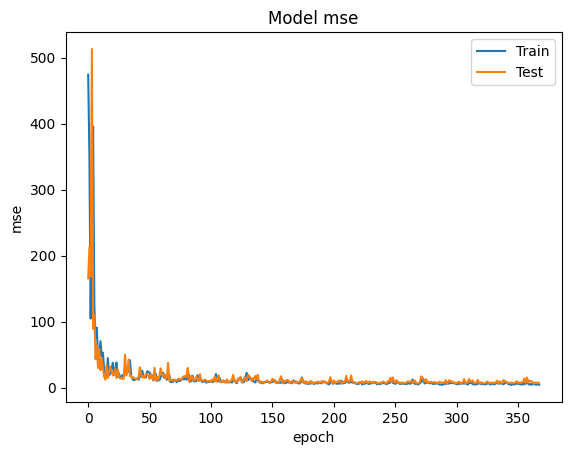

In [17]:
#draw the loss func for validation and testing
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

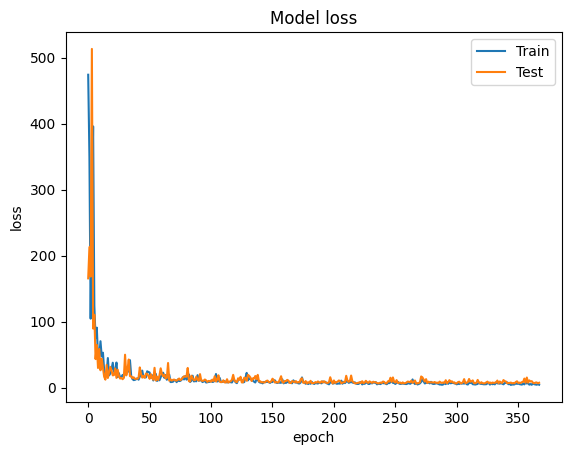

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [19]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [20]:
print(y_model.flatten())
# y_model is the output from:  y_model = model.predict(x_test_scaled)
print(y_test)

[ 8.40889   17.024384  19.836609  27.646847  22.524172  23.06217
 29.110954  22.104092  17.589836  19.463211  13.94602   14.825596
 13.345524  38.923317  15.962032  21.657177  23.154865  20.452541
 17.844715  18.889338   8.980286  11.459827  21.10737   15.360683
 19.617828  20.88904   28.660164  23.899538   9.011484  19.35569
 18.69379   12.712955  30.495636  21.817078  14.783127   7.7173142
 16.027723  16.037035  15.653596  26.43586   30.305752  25.604858
 11.275522  41.53303   28.644054  25.60624   26.62458   18.714378
 18.598871  21.823652  34.179565  17.442005   8.83137   12.59287
 36.080753  26.360394   9.896533  48.863014  32.18825   21.656681
 20.325243  12.522923  11.537487  20.387856  22.949467  20.721943
 11.085462  22.31234   12.495611   7.763475  17.843052  27.395931
 22.86359   12.455132  25.984703  19.414528  18.751328  23.389801
 34.065624   8.58351   21.176407  37.3825    16.435575  12.223489
 16.981915  17.805973  14.524452  18.03115   19.098698  24.826393
 18.220295  

In [22]:
model.save('House_Price.h5')